In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sn
plot_params = {'color': '0.75',
                'style': '.-',
                'markeredgecolor': '0.25',
                'markerfacecolor': '0.25',
                'legend': False}
sn.set_style("dark")
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.api import Holt

In [ ]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y , y_pred))
def mae(y, y_pred):
    return mean_absolute_error(y, y_pred)
def mape(y, y_pred):
    return (np.abs(y - y_pred) / y).mean() * 100
def evaluate(y, y_pred):
    print("MAE:", mae(y, y_pred))
    #print("MSE:", mse(y, y_pred))
    print("RMSE:", rmse(y, y_pred))
    print("MAPE:", mape(y, y_pred))

# Triple Exponential

This method works with the time series that are stationary, seasonality and trend.

This method;

- Can handle level, trend and seasonality
- In addition to SES, the trend and seasonality is also taken into account
- Is the most improved smoothing method
- Forecasts dynamically consider level, trend and seasonality
- Should be used with the time series that have trend and/or seasonality and single variable (feature)

**In addition to the 𝜶 and 𝜷 smoothing factors, a new parameter is added 𝜸 that controls the
influence on the seasonal component**
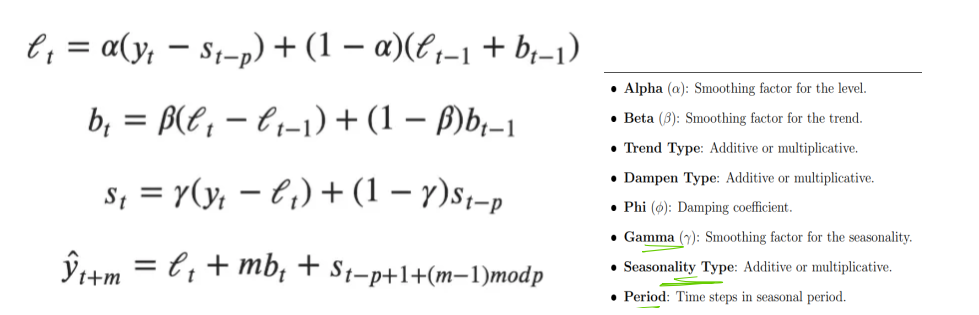

- As with the trend, the seasonality may be modeled as either an additive or multiplicative process
for a linear or exponential change in the seasonality.
- Additive Seasonality: Triple Exponential Smoothing with a linear seasonality.
- Multiplicative Seasonality: Triple Exponential Smoothing with an exponential seasonality.
- Triple exponential smoothing is the most advanced variation of exponential smoothing and
through configuration, it can also develop double and single exponential smoothing models.
- Being an adaptive method, Holt-Winter’s exponential smoothing allows the level, trend and
seasonality patterns to change over time.
- Additionally, to ensure that the seasonality is modeled correctly, the number of time steps in a
seasonal period (Period) must be specified. For example, if the series was monthly data and the
seasonal period repeated each year, then the Period=12.

In [ ]:
data = pd.read_csv("AirPassengers.csv")
data.set_index('Month', inplace=True)

<AxesSubplot:xlabel='Month'>

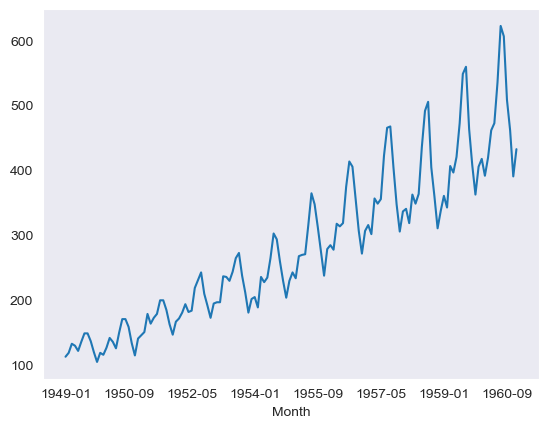

In [ ]:
data['#Passengers'].plot()

In [ ]:
ts_data = data["#Passengers"]
train = ts_data [:133]
test =  ts_data[133:]
from statsmodels.tsa.api import ExponentialSmoothing
## ADDIRIVE TREND and SEASONALITY 
triple_add = ExponentialSmoothing(train,
                              trend="add",
                              seasonal="add",
                              seasonal_periods=12).fit()
triple_preds_add = triple_add.forecast(len(test))

## MULTIPLICATIVE TREND and SEASONALITY 
triple_mul = ExponentialSmoothing(train,
                              trend="mul",
                              seasonal="mul",
                              seasonal_periods=12).fit()
triple_preds_mul = triple_mul.forecast(len(test))

#Calculate mse for both models
mse_triple_add = mean_squared_error(test,triple_preds_add)
mse_triple_mul = mean_squared_error(test,triple_preds_mul)

#print("predicted values:\n",triple_preds )
print("*"*50)
print("MSE of ADDITIVE TREND and SEASONALITY  ==", mse_triple_add)
print("*"*50)
print("MSE of MULTIPLICATIVE TREND and SEASONALITY  ==", mse_triple_mul)
print("*"*50)


**************************************************
MSE of ADDITIVE TREND and SEASONALITY  == 306.66752117714736
**************************************************
MSE of MULTIPLICATIVE TREND and SEASONALITY  == 655.910862910838
**************************************************


From the results above additive trend and seasonality is better than multiplicative

In [ ]:
evaluate(test.values,triple_preds_add.values)

MAE: 13.971104435126755
RMSE: 17.511925113394796
MAPE: 2.9241909128075614


In [ ]:
data = pd.read_csv("AirPassengers.csv")
data.set_index('Month', inplace=True)
train_window = 24  # Number of past periods to use for training
test_window = 1   # Number of future periods to use for testing

# Define lists to store actual and predicted values
y_true = []
y_pred = []
i = 0
# Loop over the data and use rolling evaluation
for i in range(train_window, len(data)-test_window+1):
    # Split data into training and testing sets
    train_data = data.iloc[i-train_window:i]
    test_data = data.iloc[i:i+test_window]
    
    ## MULTIPLICATIVE TREND and SEASONALITY 
    triple_mul = ExponentialSmoothing(train_data,
                                  trend="mul",
                                  seasonal="mul",
                                  seasonal_periods=12).fit()
    # Make predictions for testing data
    predictions = triple_mul.forecast(test_window)
    
    
    # Append actual and predicted values to lists
    y_true.append(test_data.values)
    y_pred.append(predictions)

In [ ]:
evaluate(np.concatenate(y_true).reshape(len(y_true)), np.concatenate(y_pred))

MAE: 9.51947793393919
RMSE: 12.704375268420673
MAPE: 3.340731908639416
